In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd

In [3]:
df = pd.read_csv(
    'wdbc.data', sep=",",header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df_copy = df.copy(deep = True)

In [6]:
df_copy.columns = ['ID number', 'Diagnosis', 'radius1','texture1', 'perimeter1', 'area1','smoothness1','compactness1', 'concavity1' ,'concave points1','symmetry1','fractal dimension1',  'radius2','texture2', 'perimeter2', 'area2','smoothness2','compactness2', 'concavity2' ,'concave points2','symmetry2','fractal dimension2',  'radius3','texture3', 'perimeter3', 'area3','smoothness3','compactness3', 'concavity3' ,'concave points3','symmetry3','fractal dimension3']

#### suffix 1 is mean, 2 is standard error and 3 the worst or largest as per dataset

In [7]:
f = open("wdbc.names", "r")

In [8]:
a = f.readlines()
#a

In [9]:
df_copy

,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y = df_copy['Diagnosis']
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

In [11]:
X = df_copy[df_copy.columns[2:-1]]
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,symmetry1,fractal dimension1,...,fractal dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(y)
y_new = enc.transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = .2, random_state = 42)

### Decision Tree

In [14]:
clf_at = DecisionTreeClassifier(random_state = 42)

In [15]:
clf_at = clf_at.fit(X_train,y_train)

In [16]:
y_pred_tree = clf_at.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9473684210526315


In [18]:
sklearn.metrics.confusion_matrix(y_pred_tree, y_test, sample_weight=None, normalize=None)

array([[68,  3],
       [ 3, 40]], dtype=int64)

In [19]:
cross_val_dt = cross_val_score(clf_at, X, y_new, cv=5)

In [20]:
cross_val_dt

array([0.90350877, 0.92982456, 0.92982456, 0.93859649, 0.90265487])

In [21]:
cross_val_dt.mean()

0.9208818506443099

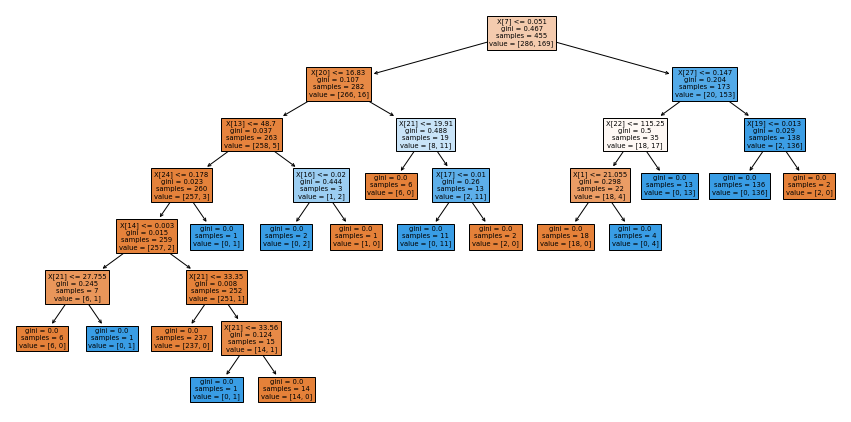

In [22]:
plt.figure(figsize = (15,7.5))
plot_tree(clf_at, filled = True)
plt.show()

### Random Forest

In [23]:
clf_rf = RandomForestClassifier(random_state = 42)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
y_pred_clf = clf_rf.predict(X_test) 

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))

Accuracy: 0.9649122807017544


In [26]:
sklearn.metrics.confusion_matrix(y_pred_clf, y_test, sample_weight=None, normalize=None)

array([[70,  3],
       [ 1, 40]], dtype=int64)

In [27]:
cross_val_rf = cross_val_score(clf_rf, X, y_new, cv=5)

In [28]:
cross_val_rf

array([0.92105263, 0.93859649, 0.98245614, 0.98245614, 0.98230088])

In [29]:
cross_val_rf.mean()

0.9613724576929048

### Comparing decision tree and random forest cross validation accuracies

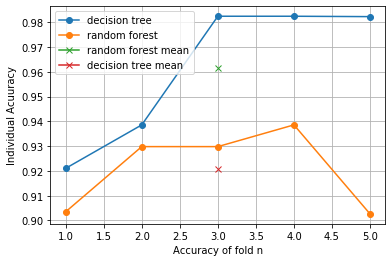

In [49]:
plt.plot(list(range(1,6)), cross_val_rf, marker = 'o', label = 'decision tree')
plt.plot(list(range(1,6)), cross_val_dt, marker = 'o', label = 'random forest')
plt.plot(3, cross_val_rf.mean(), marker = 'x', label = 'random forest mean')
plt.plot(3, cross_val_dt.mean(), marker = 'x', label = 'decision tree mean')
plt.xlabel('Accuracy of fold n')
plt.ylabel('Individual Acuuracy')
plt.legend()
plt.grid()
plt.show()

### Using Entropy as criterion 

In [30]:
clf_rf_en = RandomForestClassifier(criterion = 'entropy', random_state = 42)
clf_rf_en.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [31]:
cross_val_score(clf_rf_en, X, y_new, cv=5)

array([0.92982456, 0.93859649, 0.98245614, 0.98245614, 0.97345133])

In [32]:
cross_val_score(clf_rf, X, y_new, cv=5).mean()

0.9613724576929048

### For this particular dataset we got the same accuracy from entropy and gini criterion

### Random forest  cross_val accuracies vs n_estimators

In [33]:
n_est_list = [50, 100,150,200, 500,800, 1000]
cross_val = []
for n_est in n_est_list:
    clf_rf_cross = RandomForestClassifier(n_estimators = n_est, random_state = 42)
    clf_rf_cross.fit(X_train,y_train)
    cross_val.append(cross_val_score(clf_rf_cross, X, y_new, cv=5).mean())

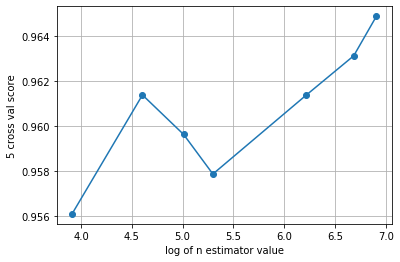

In [34]:
plt.plot(np.log(n_est_list), cross_val, marker = 'o')
plt.xlabel('log of n estimator value')
plt.ylabel('5 cross val score')
plt.grid()
plt.show()

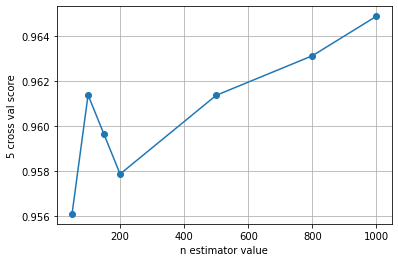

In [35]:
plt.plot(n_est_list, cross_val, marker = 'o')
plt.xlabel('n estimator value')
plt.ylabel('5 cross val score')
plt.grid()
plt.show()

### Random Forest - cross val accuracy vs max_features (2 types of inputs for max features)

### Max features as float

In [36]:
max_feat_list = [10, 20,50, 75]
cross_val_new = []
for max_feat in max_feat_list:
    clf_rf_cross_feat = RandomForestClassifier(n_estimators = n_est, max_features = max_feat/100, random_state = 42)
    clf_rf_cross_feat.fit(X_train,y_train)
    cross_val_new.append(cross_val_score(clf_rf_cross_feat, X, y_new, cv=5).mean())

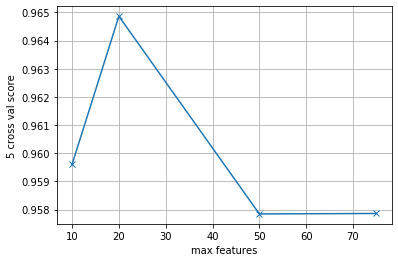

In [37]:
plt.plot(max_feat_list, cross_val_new, marker = 'x')

plt.xlabel('max features')
plt.ylabel('5 cross val score')
plt.grid()
plt.show()

### Float and int give the same results, int takes value and floats take ratio

### Max features equal, squareroot and log of n features

In [38]:
max_feat_list2 = ['auto','sqrt','log2']
cross_val_new2 = []
for max_feat_2 in max_feat_list2:
    clf_rf_cross_feat2 = RandomForestClassifier(n_estimators=100,random_state=42,max_features= max_feat_2)
    clf_rf_cross_feat2.fit(X,y)
    cross = cross_val_score(clf_rf_cross_feat2, X,y, cv=5).mean()
    cross_val_new2.append(cross)

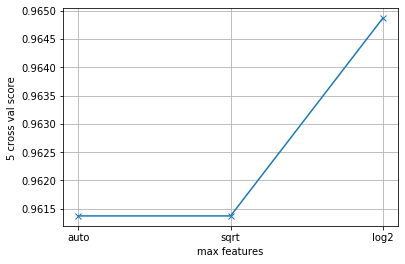

In [39]:
plt.plot(max_feat_list2, cross_val_new2, marker = 'x')

plt.xlabel('max features')
plt.ylabel('5 cross val score')
plt.grid()
plt.show()

### I tried to split the dataset into three different tables as mentioned in dataset info(mean, std error, worst/largest) and overall they performed worse individually Accuracy of split 1(mean): 0.7543859649122807, Accuracy 2(std): 0.6228070175438597, Accuracy 3(largest) : 0.956140350877193 while together accuracy - .9613724576929048

### Since dataset is small there is no difference between gin and entropy otherwise gin is faster and entropy gives better accuracy

### There were different dips in graph of n estimators for different values but overall the trend was that accuracy increases as n_estimator increases and for max_feat there was no real trend so trying to try different values for different dataset may increase accuracy 